# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [12]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import os

C:\Users\serge\AppData\Local\Temp\ipykernel_28388\2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

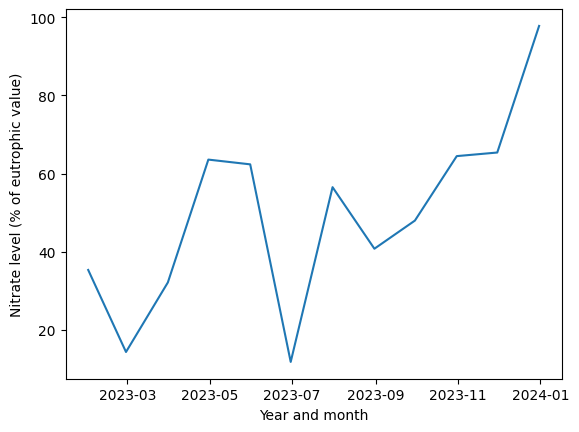

In [2]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

C:\Users\serge\AppData\Local\Temp\ipykernel_28388\1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

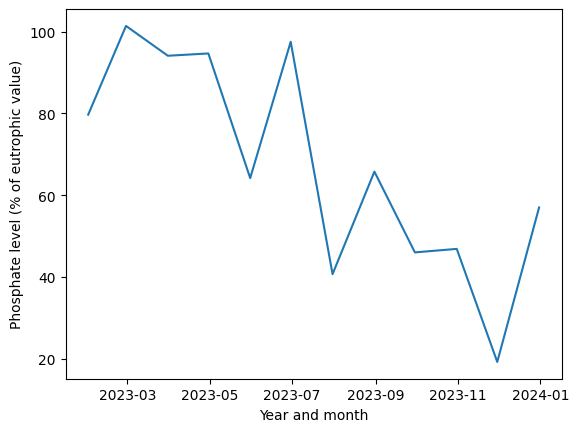

In [3]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

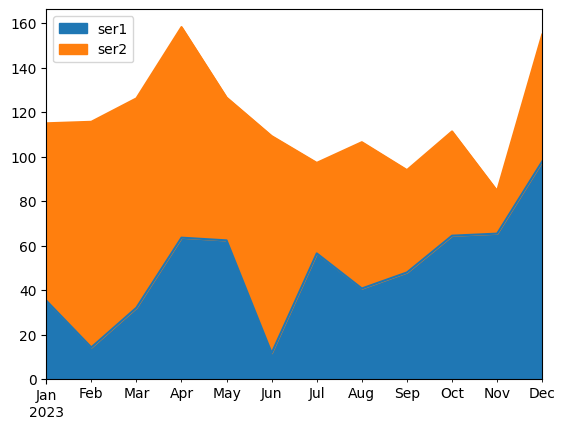

In [4]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

C:\Users\serge\AppData\Local\Temp\ipykernel_28388\416949720.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


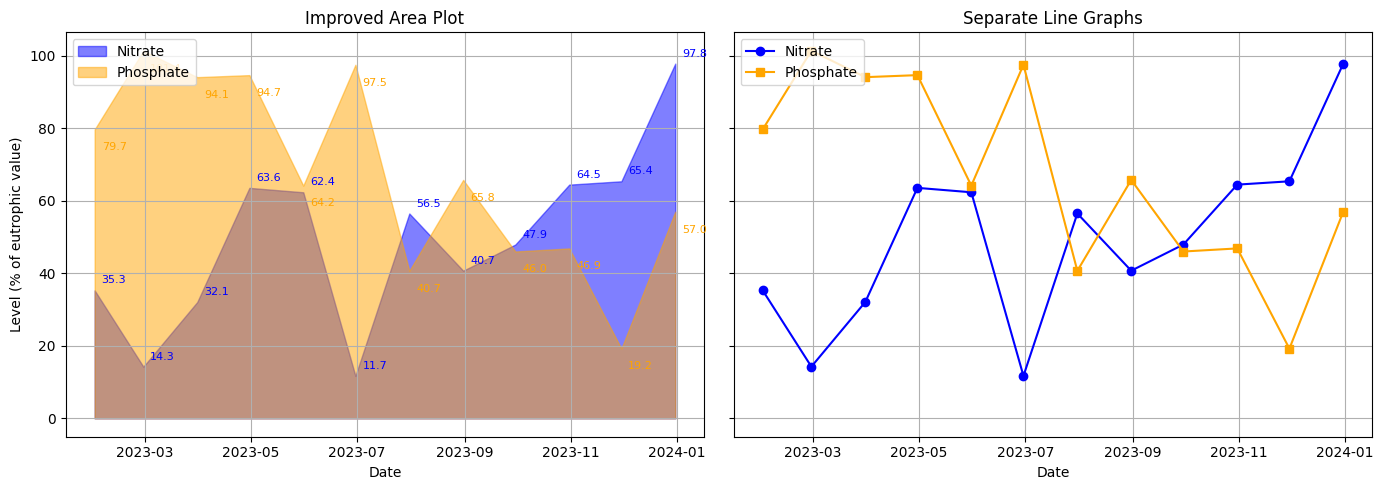

In [8]:
import matplotlib.pyplot as plt

# Generate sample data for nitrate and phosphate levels
numdates = 12
np.random.seed(0)
nitrate = 100 * (np.random.normal(size=numdates) / 5 + np.arange(numdates) / 16)
np.random.seed(1)
phosphate = 100 * (1 - (np.random.normal(size=numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')

# Create a DataFrame to hold the data
df = pd.DataFrame({'Nitrate': nitrate, 'Phosphate': phosphate}, index=datearray)

# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5), sharey=True)

# -----------------------
# Left subplot: Improved Area Plot
# -----------------------
# Use fill_between for each series with transparency to avoid overlap issues
axes[0].fill_between(datearray, df['Nitrate'], color='blue', alpha=0.5, label='Nitrate')
axes[0].fill_between(datearray, df['Phosphate'], color='orange', alpha=0.5, label='Phosphate')
axes[0].set_title("Improved Area Plot")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Level (% of eutrophic value)")
axes[0].grid(True)
axes[0].legend(loc='upper left')

# Adding annotations to show specific values at each date for clarity
for date, val in zip(datearray, df['Nitrate']):
    axes[0].annotate(f"{val:.1f}", xy=(date, val), xytext=(5, 5),
                     textcoords="offset points", fontsize=8, color='blue')
for date, val in zip(datearray, df['Phosphate']):
    axes[0].annotate(f"{val:.1f}", xy=(date, val), xytext=(5, -15),
                     textcoords="offset points", fontsize=8, color='orange')

# -----------------------
# Right subplot: Separate Line Graphs
# -----------------------
# Plot nitrate and phosphate with markers and gridlines for clear individual trends
axes[1].plot(datearray, df['Nitrate'], marker='o', linestyle='-', color='blue', label='Nitrate')
axes[1].plot(datearray, df['Phosphate'], marker='s', linestyle='-', color='orange', label='Phosphate')
axes[1].set_title("Separate Line Graphs")
axes[1].set_xlabel("Date")
axes[1].grid(True)
axes[1].legend(loc='upper left')

plt.tight_layout()
plt.show()


#### Area Plot Advantages:
- Shows overall nutrient load and relative contributions.
- Provides a visually impactful cumulative view.

#### Area Plot Disadvantages:
- Overlapping areas can obscure individual trends.
- Harder to pinpoint exact values.

#### Separate Line Graph Advantages:
- Clearly displays individual trends.
- Facilitates precise comparisons.

#### Improvements:
- Use transparency/hatching in area plots to reduce overlap.
- For line graphs, consider shared axes and markers for clarity.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [15]:
# set variables
kaggle_dataset_path = "ramyhafez/bank-customer-churn"
kaggle_dataset_file_name = "Bank_Churn.csv"
print(f"Path to kaggle dataset: {kaggle_dataset_path}")
print(f"Kaggle dataset file name: {kaggle_dataset_file_name}")

# download the data set
kaggle_dataset_local_path = kagglehub.dataset_download(kaggle_dataset_path)
print(f"Path to downloaded file: {kaggle_dataset_local_path}")

# read csv file to pandas dataframe
kaggle_dataset_local_path_to_file = os.path.join(kaggle_dataset_local_path, kaggle_dataset_file_name)
kaggle_dataset_raw = pd.read_csv(kaggle_dataset_local_path_to_file)

# copy dataframe for EDA
dataset = kaggle_dataset_raw.copy()
dataset.head()

Path to kaggle dataset: ramyhafez/bank-customer-churn
Kaggle dataset file name: Bank_Churn.csv
Path to downloaded file: C:\Users\serge\.cache\kagglehub\datasets\ramyhafez\bank-customer-churn\versions\1


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [25]:
# Find Correlations:
# Compute the correlation matrix for numerical variables
df_numeric = dataset.select_dtypes(include=['number','float64','int64']).drop(columns=['CustomerId'])
correlation_matrix = df_numeric.corr()
correlation_matrix


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


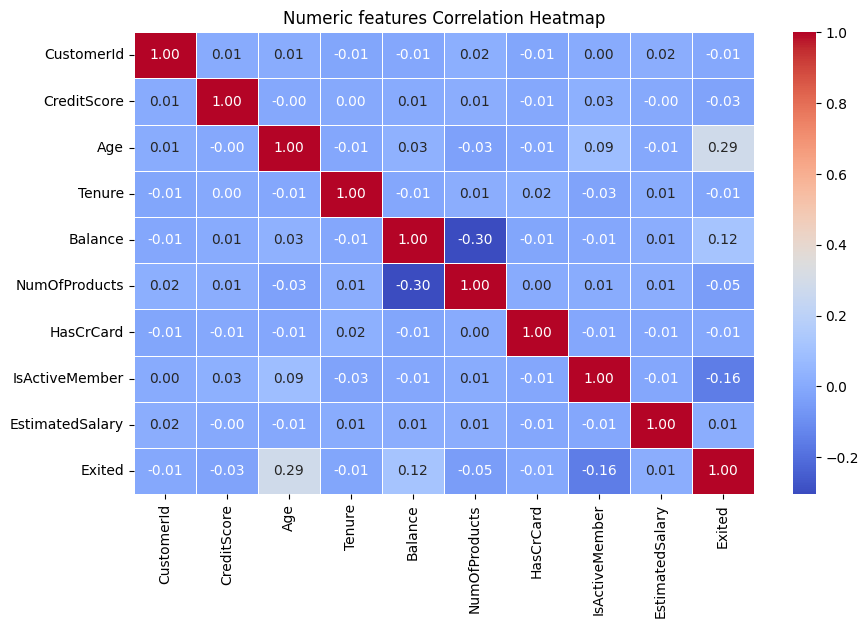

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Numeric features Correlation Heatmap")
plt.show()

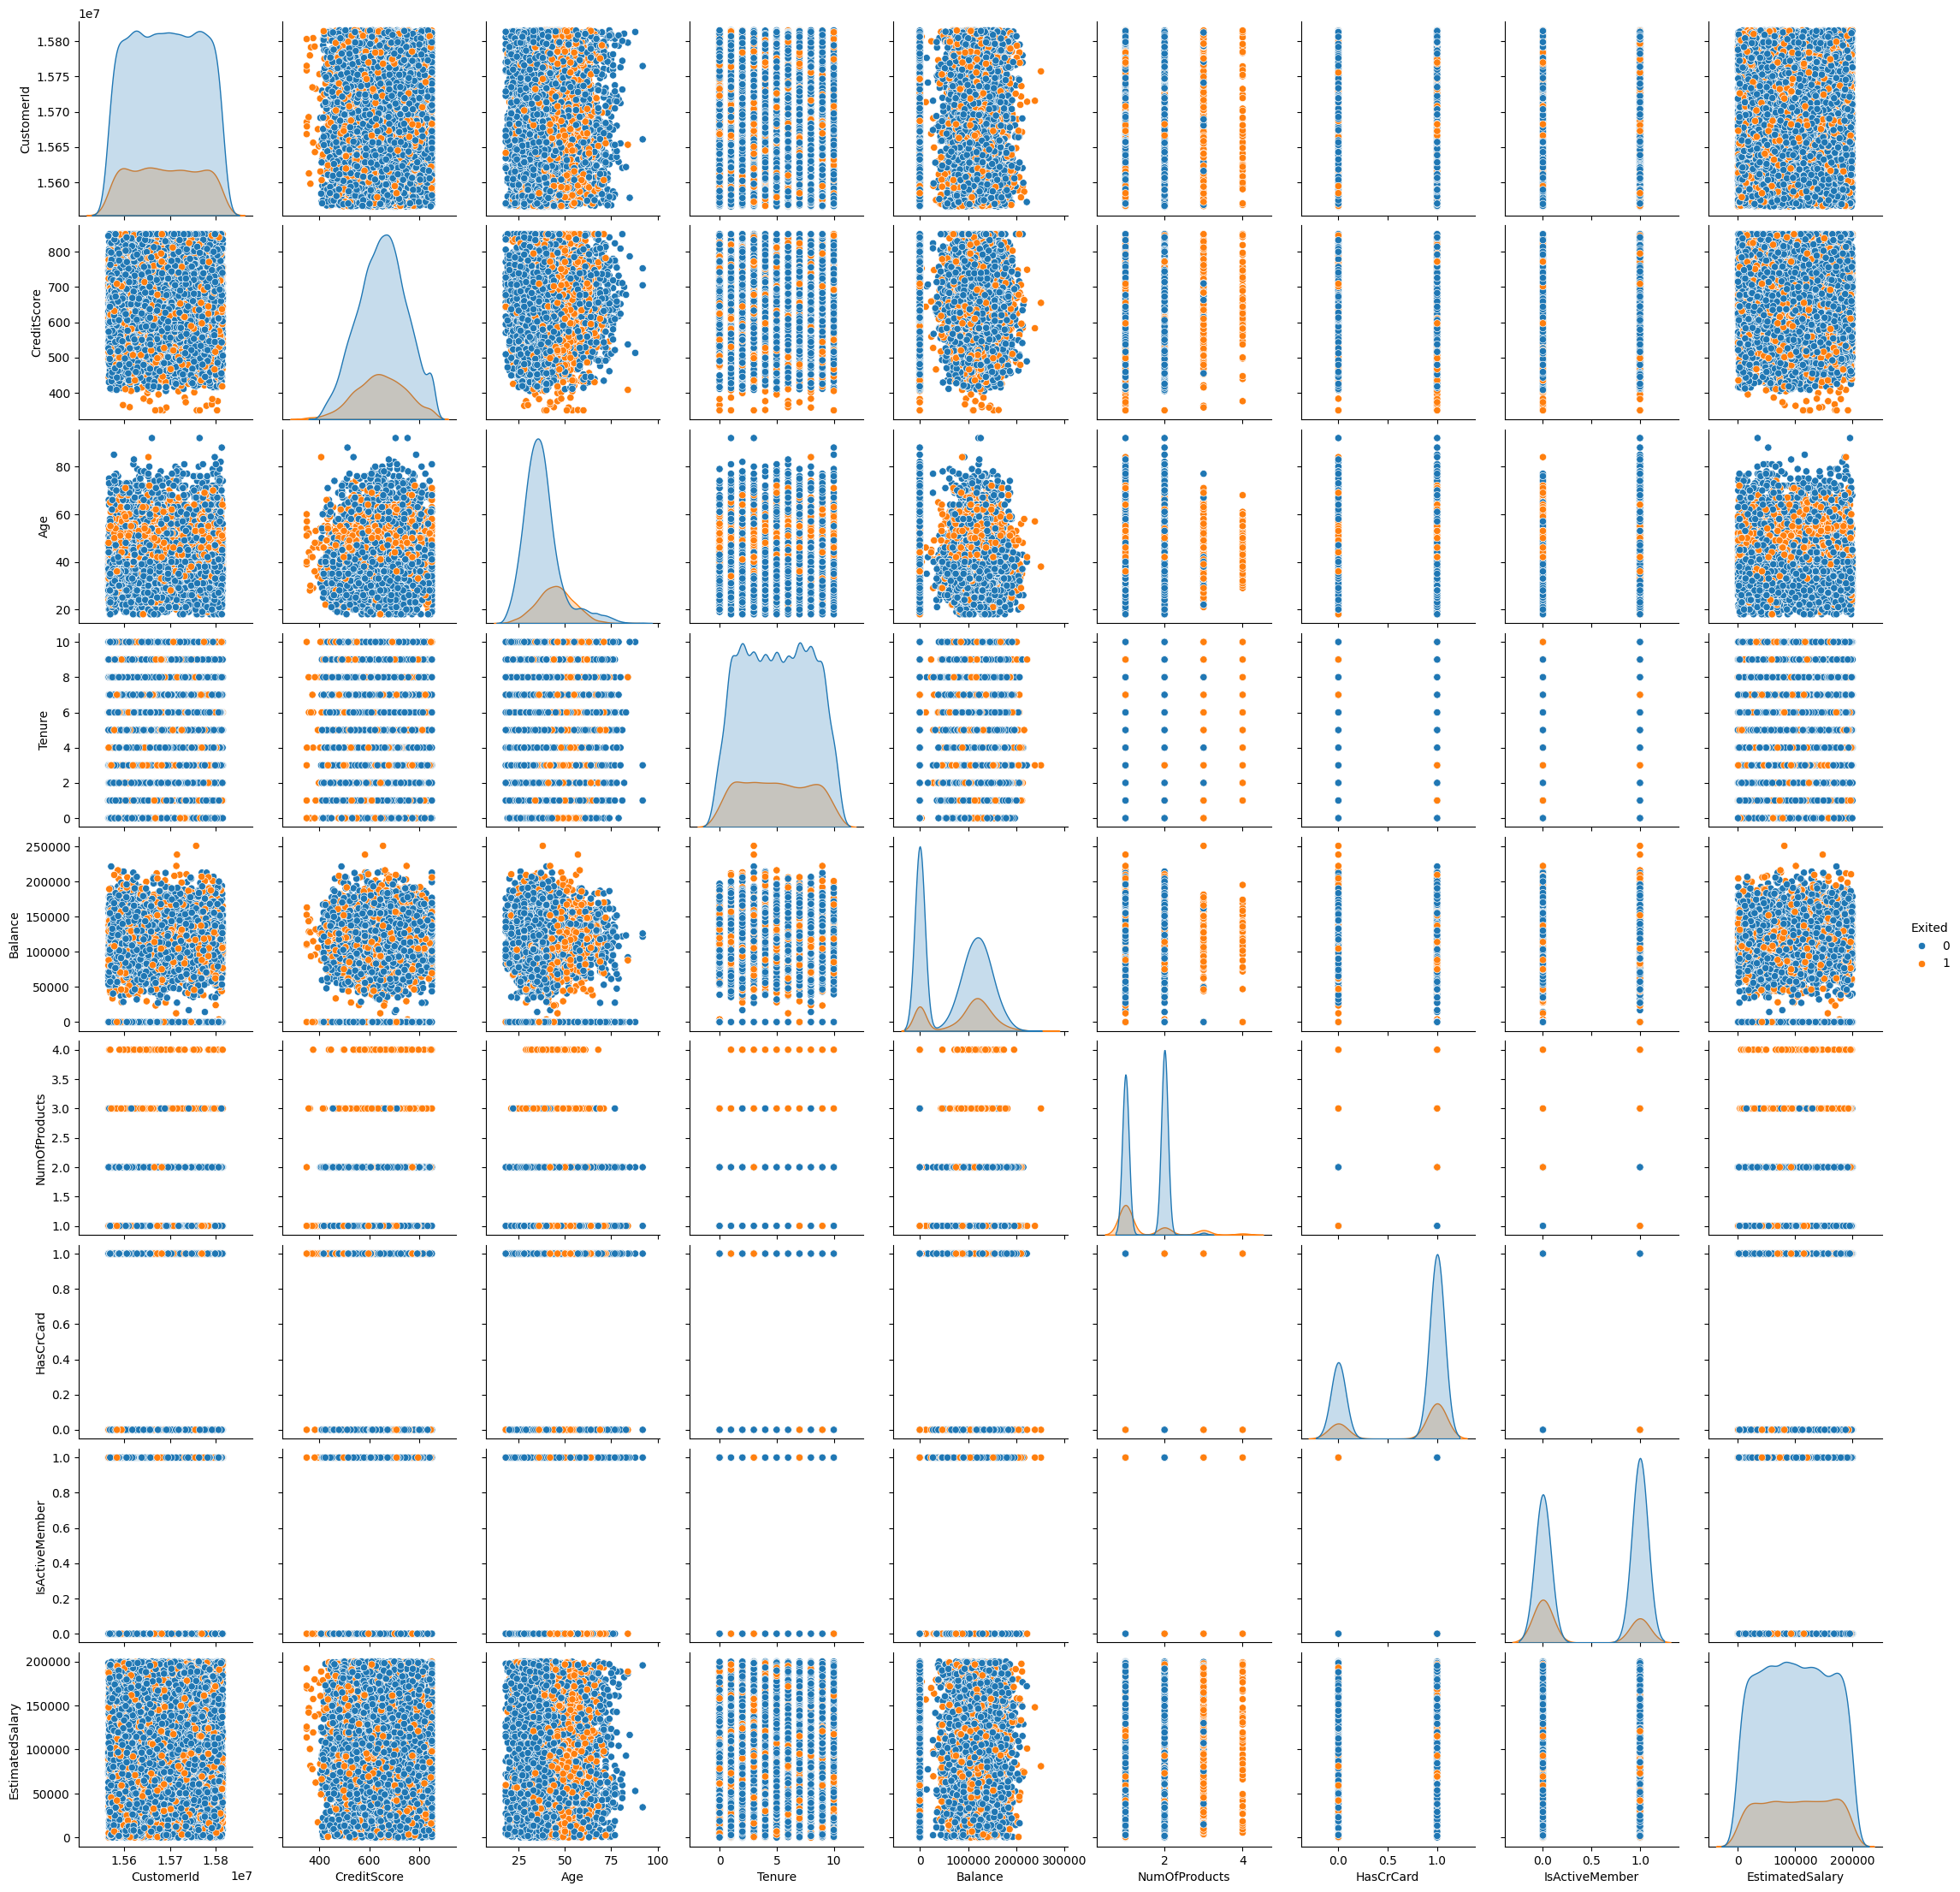

In [42]:
sns.pairplot(dataset, hue="Exited")
plt.show()



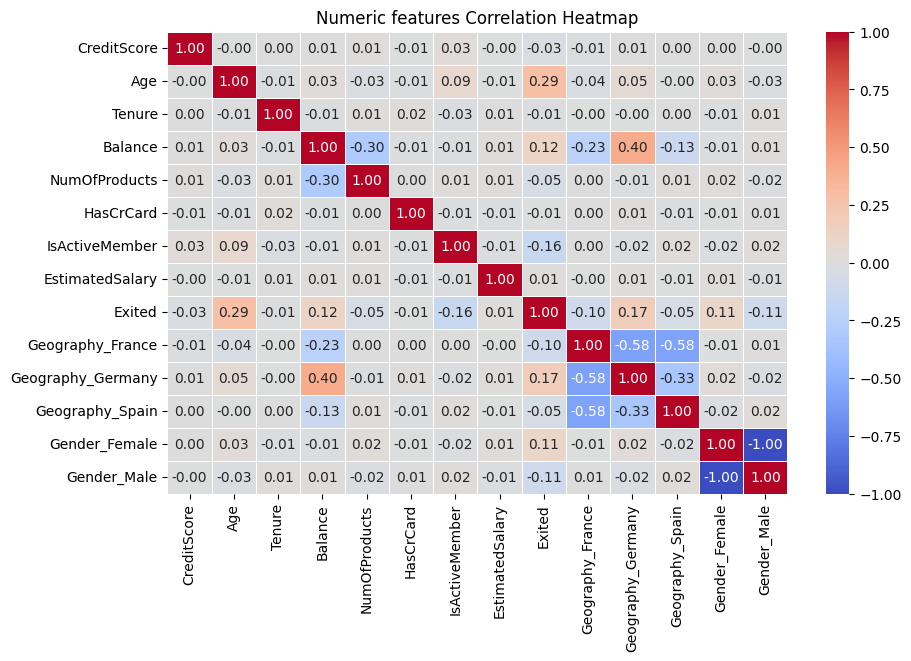

In [53]:
dataset_encoded = pd.get_dummies(dataset, columns=['Geography', 'Gender'])

# Convert all boolean columns to integer format
bool_cols = dataset_encoded.select_dtypes(include=["bool"]).columns
dataset_encoded[bool_cols] = dataset_encoded[bool_cols].astype(int)


plt.figure(figsize=(10, 6))
sns.heatmap(dataset_encoded.select_dtypes(include=['number','float64','int64']).drop(columns=['CustomerId']).corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Numeric features Correlation Heatmap")
plt.show()

In [60]:
# Plot Time Series (if Date/Time data exists)
# NOTE: Date/Time data does not exist in this dataset
print("NOTE: Date/Time data does not exist in this dataset")


NOTE: Date/Time data does not exist in this dataset


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

#### Figure 3.19 Remove gridlines (page 93)

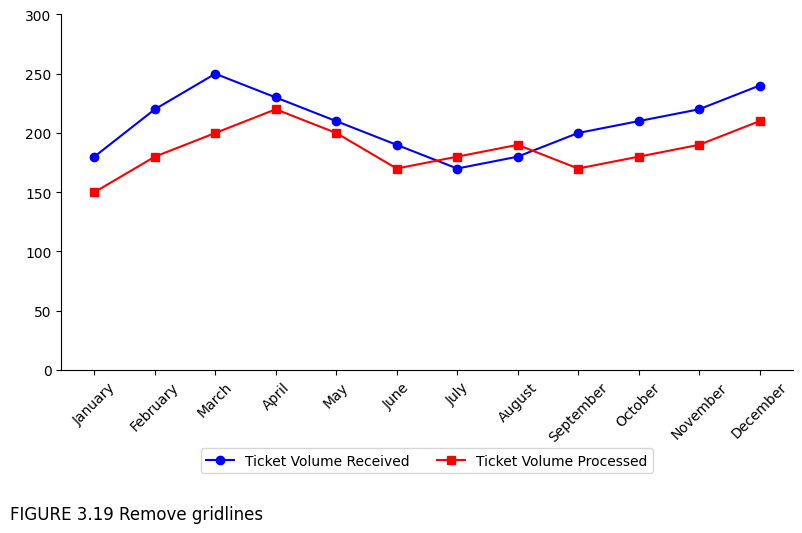

In [ ]:

# Sample data
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

ticket_volume_received = [180, 220, 250, 230, 210, 190, 170, 180, 200, 210, 220, 240]
ticket_volume_processed = [150, 180, 200, 220, 200, 170, 180, 190, 170, 180, 190, 210]

# Create plot
plt.figure(figsize=(8, 5))

# Plot each series with distinct markers and colors
plt.plot(months, ticket_volume_received, color='blue', marker='o', label='Ticket Volume Received')
plt.plot(months, ticket_volume_processed, color='red', marker='s', label='Ticket Volume Processed')

# Remove gridlines
plt.grid(False)

# Optionally remove top and right spines for a cleaner look
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Adjust y-axis range to roughly match the example
plt.ylim(0, 300)

# Add legend, labels, and title
plt.legend(
    loc='upper center',       # position in the figure
    bbox_to_anchor=(0.5, -0.2),  # adjust X, Y position relative to the axes
    ncol=2                   # number of columns in the legend
)

plt.xticks(rotation=45)

plt.figtext(0, -0.05, "FIGURE 3.19 Remove gridlines", ha='left', fontsize=12)
# Display
plt.tight_layout()
plt.show()
